13. Частоты вещественного непрерывного сигнала $f(t)$ ограничены сверху 5 кГц (пять тысяч герц). В результате его дискретизации с частотой 10 кГц получилась дискретная последовательность $f[n]$ где $f[n]=f(n \cdot \Delta t), \Delta t=10^{-4}$. Выберем окно в 1000 точек и рассмотрим в нем ДПФ, какой непрерывной частоте отвечает $\hat{f}_{800}$ ?

DFT N=1000 точек выглядит следующим образом:
$$
F[k] = \sum\limits_{n=0}^{N-1} f[n] e^{-j (2 \pi /N)nk}
$$
Вспомним несколько равенств:
$$
\omega_k = \frac{2 \pi k}{N}\\
f_k = \frac{\omega_k f_s}{2 \pi}
$$
где $f_s$ - частота семплирования, то есть 10кГц в нашем случае,
тогда
так как $F[e^{jw}] = F[e^{jw + 2 \pi}]$, то для $k = 800$:
$$
\omega_k = \frac{2 \pi}{N} k = \frac{2 \pi}{N} (k - N) = -200 \cdot \frac{2 \pi}{N}
$$

14. Частоты вещественного непрерывного сигнала $f(t)$ ограничены сверху 5 кГц (пять тысяч герц). В результате его дискретизации с частотой 10 кГц получилась дискретная последовательность $f[n]$ где $f[n]=f(n \cdot \Delta t), \Delta t=10^{-4}$. Выберем окно в 1000 точек и рассмотрим в нем ДПФ, какой непрерывной частоте отвечает $\hat{f}_{800}$ ?

(будем использовать формулы, выведенные в прошлой задаче)

$$
\omega_k = 150 \cdot \frac{2\pi}{1000}
= \frac{3}{10} \pi\\
f_k = \frac{3 \pi 10000}{2 \pi 10} = 1500 \text{ Hz}
$$

20. Численное интегрирование Для полиномов трех переменных $x, y, z$ из списка ниже найти с точностью до второго знака после запятой численные характеристики их ограничений на двумерную сферу единичного радиуса, то есть указать их свойства в в пространстве $L^2\left(S^2\right)$
$$
\begin{aligned}
P_1 & =\frac{3 \sqrt{35}}{\sqrt{16 \pi}}\left(x^3 y-x y^3\right) \quad P_2=\sqrt{\frac{45}{32 \pi}}\left(7 y z^3-3 y z\right) \\
P_3 & =\sqrt{\frac{45}{16 \pi}}\left(7 x y z^2-x y\right) \quad P_4=\frac{3}{16 \sqrt{\pi}}\left(35 z^4-30 z^2+3\right) \\
Q_1 & =\sqrt{\frac{5}{16 \pi}}\left(2 z^2-x^2-y^2\right) \quad Q_2=\sqrt{\frac{15}{4 \pi}} z x \\
Q_3 & =\sqrt{\frac{105}{4 \pi}} x y z \quad Q_4=\sqrt{\frac{7}{16 \pi}}\left(2 z^3-3 z x^2-3 y^2 z\right)
\end{aligned}
$$

(a) угол в градусах между $P_2$ и $P_3$ и норму суммы $\left\|P_4+Q_4\right\|$

(b) угол в градусах между $P_2$ и $Q_2$ и норму разности $\left\|P_1-Q_3\right\|$

Норму можно считать также как и здесь (но с учетом того что мы на сфере)
https://math.stackexchange.com/questions/4562316/typical-norm-on-polynomial-vector-spaces

In [ ]:
import numpy as np
from scipy.integrate import dblquad

# Define the polynomials
P2 = lambda x, y, z: np.sqrt(45/(32*np.pi))*(7*y*z**3 - 3*y*z)
P3 = lambda x, y, z: np.sqrt(45/(16*np.pi))*(7*x*y*z**2 - x*y)
P4 = lambda x, y, z: 3/(16*np.sqrt(np.pi))*(35*z**4 - 30*z**2 + 3)
Q4 = lambda x, y, z: np.sqrt(7/(16*np.pi))*(2*z**3 - 3*z*x**2 - 3*y**2*z)

# Function to calculate the inner product on the unit sphere
def inner_product(f, g):
    result = dblquad(lambda x, y: f(np.sin(x)*np.cos(y), np.sin(x)*np.sin(y), np.cos(x)
                                )*g(np.sin(x)*np.cos(y), np.sin(x)*np.sin(y), np.cos(x)
                                )*np.sin(x), 0, np.pi, lambda x: 0, lambda x: 2*np.pi)[0]
    return result


# Calculate the angle between P2 and P3
angle_P2_P3 = np.arccos(inner_product(P2, P3) / (np.sqrt(inner_product(P2, P2)) * np.sqrt(inner_product(P3, P3))))
angle_P2_P3_degrees = np.degrees(angle_P2_P3)
print(f"The angle between P2 and P3 is: {angle_P2_P3_degrees:.4f} degrees")

# Calculate the norm of P4 + Q4
P1_coeff = inner_product(P4, P4)
Q3_coeff = inner_product(Q4, Q4)
P1Q3_coeff = inner_product(P4, Q4)
norm_squared = P4_coeff + Q4_coeff + 2 * P4Q4_coeff
norm = np.sqrt(norm_squared)
print(f"Norm of P4 + Q4: {norm:.4f}")

The angle between P2 and P3 is: 89.8698 degrees
Norm of P4 + Q4: 0.5982


аналогично

In [ ]:
# Define the polynomials
P1 = lambda x, y, z: (3 *np.sqrt(35) / np.sqrt(16 * np.pi)) * (x**3 * y - x * y**3)
P2 = lambda x, y, z: np.sqrt(45 / (32 * np.pi)) * (7 * y * z**3 - 3 * y * z)
Q2 = lambda x, y, z: np.sqrt(15 / (4 * np.pi)) * z * x
Q3 = lambda x, y, z: np.sqrt(105 / (4 * np.pi)) * x * y * z

# Compute the angle between P2 and Q2

# Calculate the angle between P2 and Q2
angle_P2_Q2 = np.arccos(inner_product(P2, Q2) / (np.sqrt(inner_product(P2, P2)) * np.sqrt(inner_product(Q2, Q2))))
angle_P2_Q2_degrees = np.degrees(angle_P2_Q2)
print(f"The angle between P2 and Q2 is: {angle_P2_Q2_degrees:.4f} degrees")

# Calculate the norm of P1 - Q3
P1_coeff = inner_product(P1, P1)
Q3_coeff = inner_product(Q3, Q3)
P1Q3_coeff = inner_product(P1, Q3)
norm_squared = P1_coeff + Q3_coeff - 2 * P1Q3_coeff
norm = np.sqrt(norm_squared)
print(f"Norm of P1 - Q3: {norm:.4f}")

The angle between P2 and Q2 is: 90.2256 degrees
Norm of P1 - Q3: 0.0000


21. Работа с видеообразами Пронумерованные файлы в директории Data содержат либо значения логарифма от модуля двумерного Фурье-преобразования $\hat{f}_m\left(\omega_1, \omega_2\right)$ либо значения аргументов (в радианах) от ( $\hat{f}_m\left(\omega_1, \omega_2\right)$. Изображения $f_m\left(x_1, x_2\right)$ отвечают отдельным буквам русского алфавита, эти буквы Подробно объясните (лучше бы качественно, воспользовавшись лишь определением двумерного преобразования Фурье) соответствие между номерами и исходными буквами.

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def fourier_transform_png_image(image_path):
    # Load the PNG image
    image = cv2.imread(image_path, 0)  # Read the image in grayscale

    # Perform Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    phase_spectrum = np.angle(fshift)

    # Display the Results
    plt.figure(figsize=(12, 6))

    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Logarithm'), plt.xticks([]), plt.yticks([])

    plt.figure(figsize=(12, 6))
    plt.imshow(phase_spectrum, cmap='hsv')
    plt.title('Argument'), plt.xticks([]), plt.yticks([])

    plt.show()

Bk1 = BkH

Bk2 = BkP

Bk3 = BkSH

Bk4 = BkU

Bk5 = BkR

Bk6 = BkO

Bk7 = BkX

Bk8 = BkYU

<ipython-input-45-cfe0f07b561d>:12: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


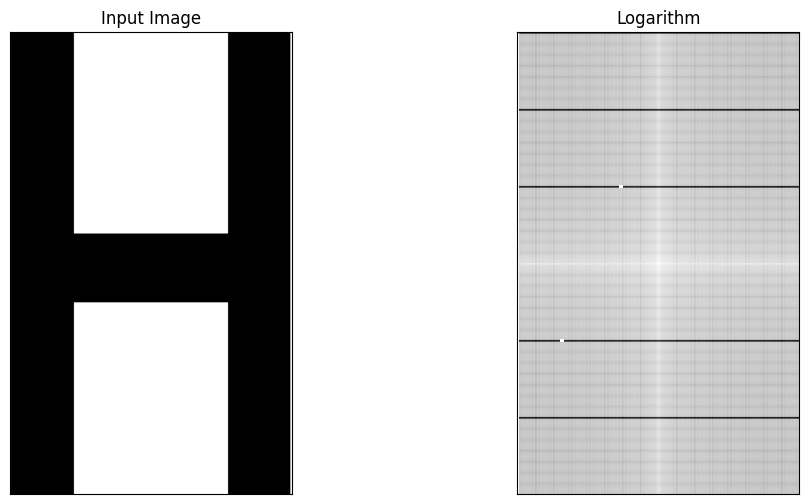

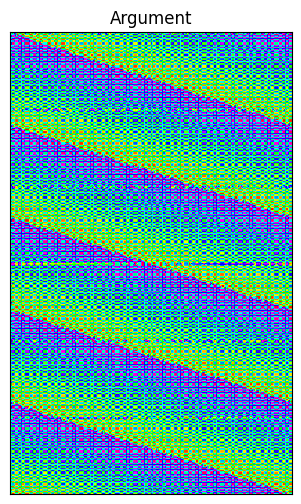

In [61]:
fourier_transform_png_image('BkN.png')

Bk1 = BkH

In [60]:
fourier_transform_png_image('BkO.png')

Bk6 = BkO

<ipython-input-45-cfe0f07b561d>:12: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20 * np.log(np.abs(fshift))


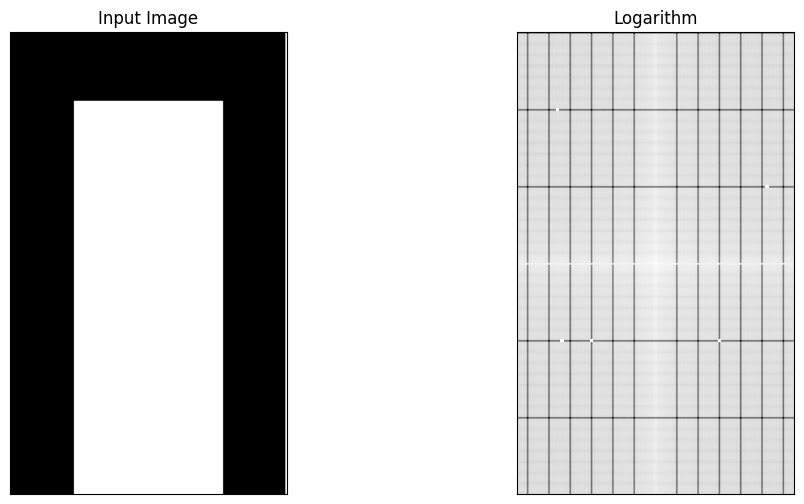

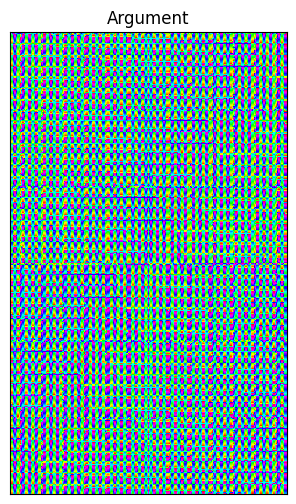

In [59]:
fourier_transform_png_image('BkP.png')

Bk2 = BkP

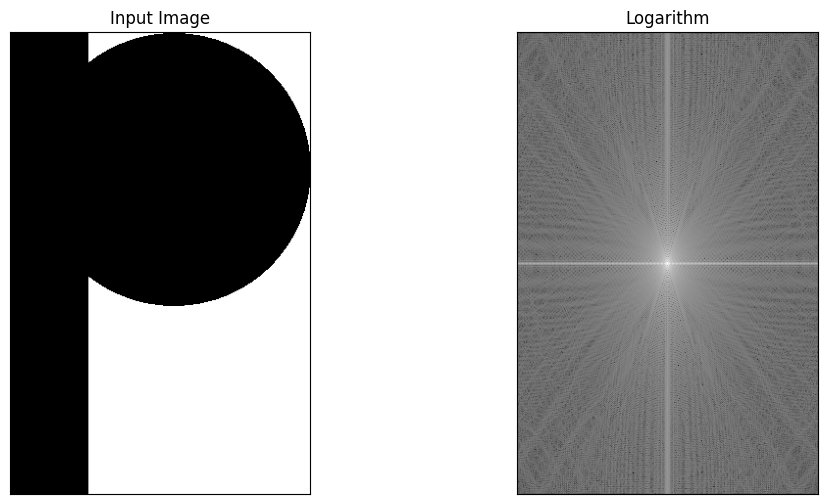

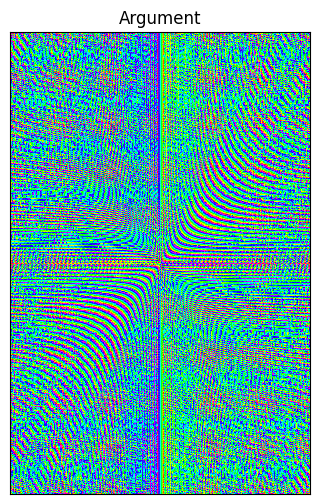

In [58]:
fourier_transform_png_image('BkR.png')

Bk5 = BkR

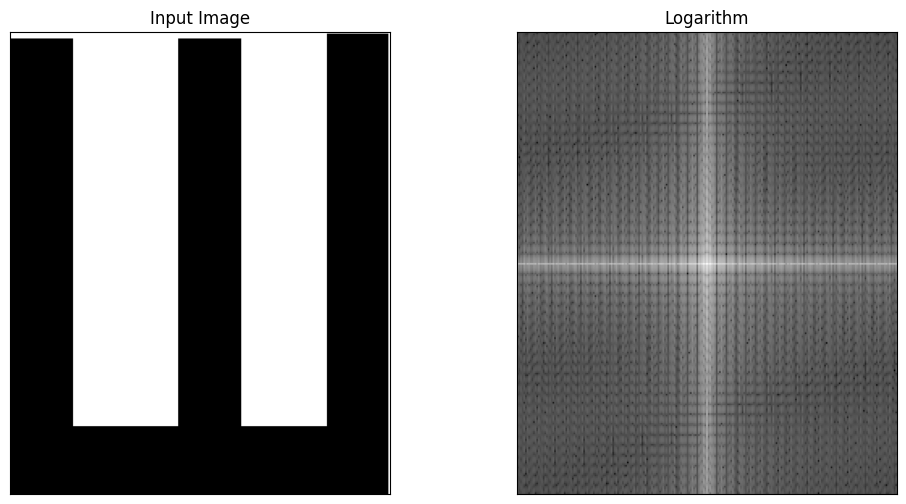

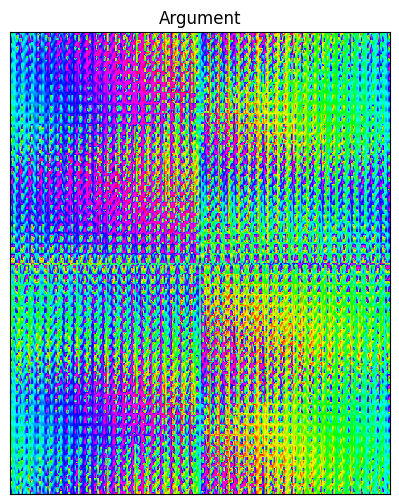

In [57]:
fourier_transform_png_image('BkSH.png')

Bk3 = BkSH

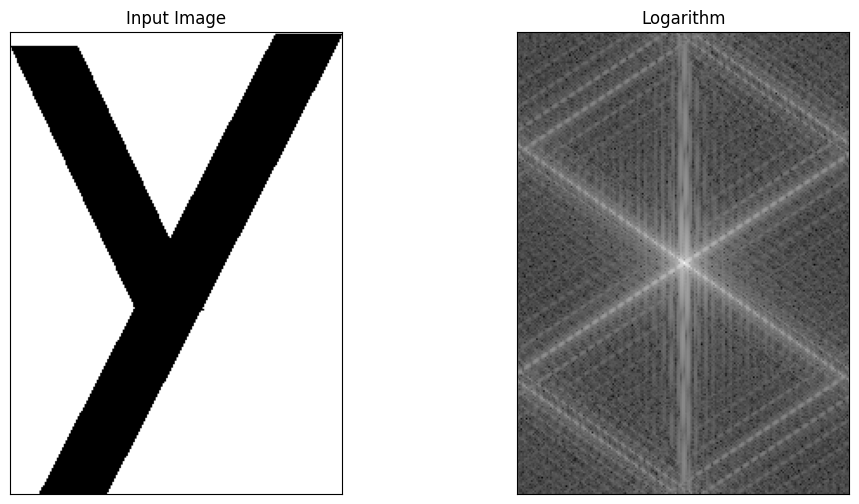

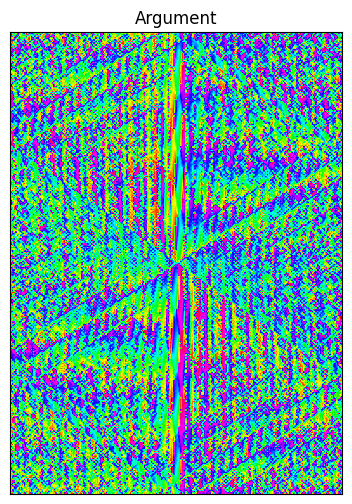

In [56]:
fourier_transform_png_image('BkU.png')

Bk4 = BkU

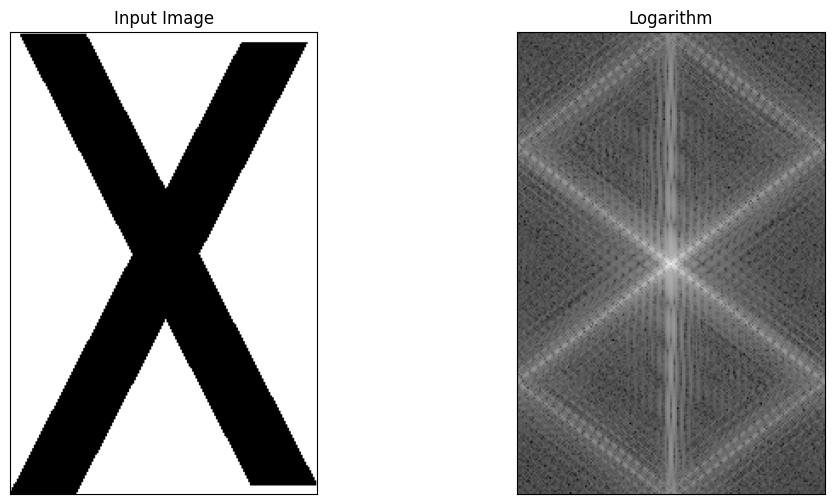

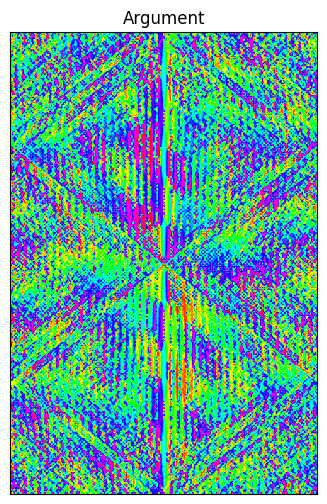

In [55]:
fourier_transform_png_image('BkX.png')

Bk7 = BkX

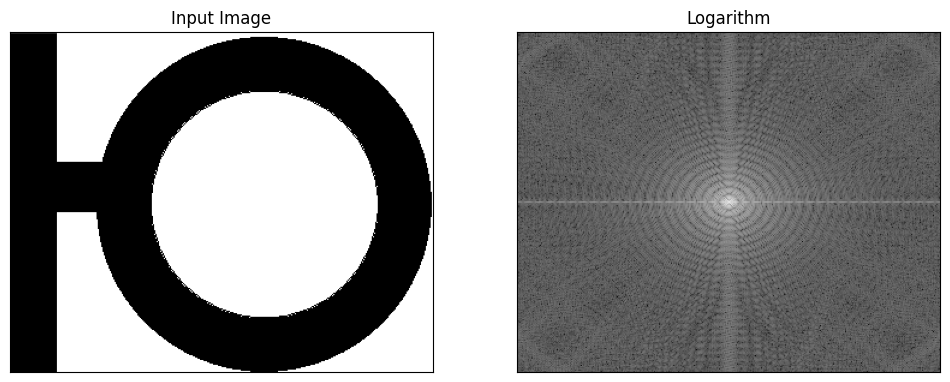

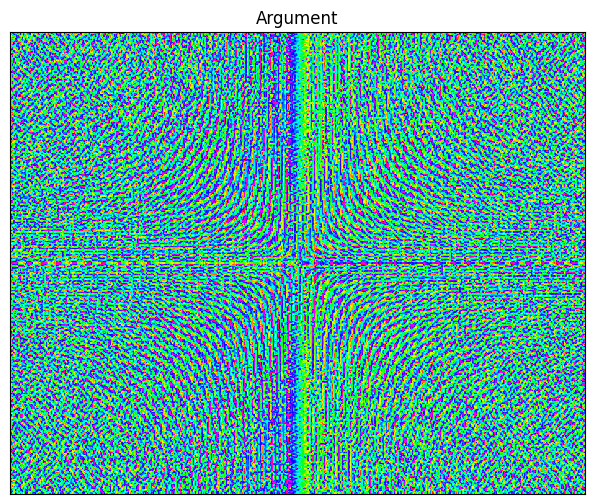

In [54]:
fourier_transform_png_image('BkYU.png')

Bk8 = BkYU

22. Работа с видеообразами Рассмотрим действия двумерной (циклической) свертки * на несложное черно-белое изображение $P=$ horse.png. Более детально: зафиксируем две $2 \times 2$ матрицы $A=\left[\begin{array}{cc}0 & 1 \\ -1 & 0\end{array}\right]$ и $B=\left[\begin{array}{cc}1 & 0 \\ 0 & -1\end{array}\right]$ и (нелинейное) преобразование $P \mapsto Q$ на основе суммы абсолютных значений двух циклических сверток: $Q=|P * A|+|P * B|$. Нарисовать (в центре пиксельной картинки) изображение $Q$ и объяснить получившийся эффект. Циклическая свертка как обычно реализуема поаргументным умножением в спектральной области.

In [16]:
import numpy as np
from PIL import Image

# Load the horse image
horse = Image.open("horse.png").convert("L")
horse_array = np.array(horse)

# Define convolution matrices
A = np.array([[0, 1], [-1, 0]])
B = np.array([[1, 0], [0, -1]])

# Compute Fourier transforms
horse_fft = np.fft.fft2(horse_array)
A_fft = np.fft.fft2(A, horse_array.shape)
B_fft = np.fft.fft2(B, horse_array.shape)

# Perform cyclic convolutions in the spectral domain
conv_A = np.real(np.fft.ifft2(horse_fft * A_fft))
conv_B = np.real(np.fft.ifft2(horse_fft * B_fft))

# Compute Q as the sum of absolute values of convolutions
Q = np.abs(conv_A) + np.abs(conv_B)

# Normalize and convert to 8-bit unsigned integer
Q = (Q / Q.max() * 255).astype(np.uint8)

# Save the resulting image
Image.fromarray(Q).save("result.png")

![result.png](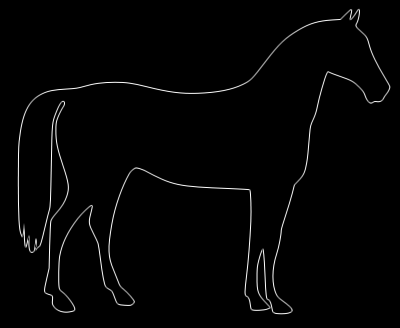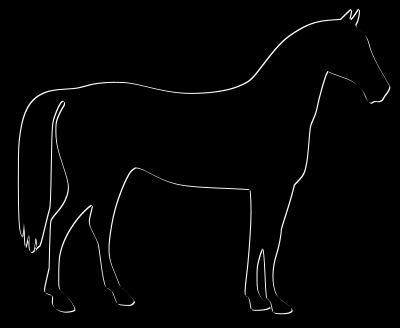)

Чтобы понять работает данное преобразование, можно рассмотреть отдельные слагаемые:

In [17]:
Q = np.abs(conv_A)

# Normalize and convert to 8-bit unsigned integer
Q = (Q / Q.max() * 255).astype(np.uint8)

# Save the resulting image
Image.fromarray(Q).save("result_A.png")

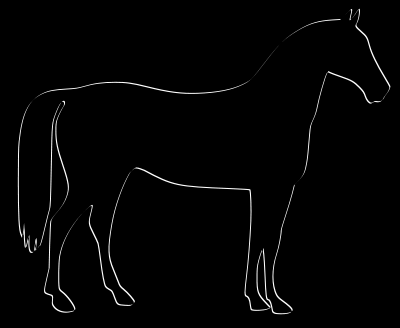

In [18]:
Q = np.abs(conv_B)

# Normalize and convert to 8-bit unsigned integer
Q = (Q / Q.max() * 255).astype(np.uint8)

# Save the resulting image
Image.fromarray(Q).save("result_B.png")

Матрицы свертки A и B действуют как детекторы границ, фиксируя горизонтальные и вертикальные границы соответственно. Взяв сумму абсолютных значений, полученное изображение Q выделяет как горизонтальные, так и вертикальные края, очерчивая форму лошади.